In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install git+https://github.com/huggingface/transformers
# !pip install sentencepiece
# !pip install datasets

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-h80n9_js
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-h80n9_js
  Resolved https://github.com/huggingface/transformers to commit 476be08c4aa96f8c1cae4200d2677bbe8f12cf80
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.32.0.dev0-py3-none-any.whl size=7403831 sha256=7c67f2abfde047e226ba86f4ca39b3510f922272a27e7aa0f13c47baab1cc899
  Stored in directory: /tmp/pip-ephem-wheel-cache-k1qrosgm/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully

In [4]:
!git clone https://github.com/huggingface/transformers

Cloning into 'transformers'...
remote: Enumerating objects: 149655, done.
remote: Counting objects: 100% (678/678), done.
remote: Compressing objects: 100% (461/461), done.
remote: Total 149655 (delta 392), reused 391 (delta 186), pack-reused 148977
Receiving objects: 100% (149655/149655), 154.19 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (111075/111075), done.


In [5]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
import json
def create_data(mode="train"):
    ja = []
    en = []
    with open(f"/content/kftt-data-1.0/data/orig/kyoto-{mode}.ja", "r", encoding="utf-8") as f:
        ja = [l.strip() for l in f.readlines()]
    with open(f"/content/kftt-data-1.0/data/orig/kyoto-{mode}.en", "r", encoding="utf-8") as f:
        en = [l.strip() for l in f.readlines()]

    with open(f"/content/drive/MyDrive/nlp100/data/{mode}.json", "w", encoding="utf-8") as f:
        for i in range(len(ja)):
            obj = {'translation': {'ja': ja[i], 'en': en[i]}}
            json.dump(obj, f, ensure_ascii=False)
            f.write('\n')

create_data("train")
create_data("dev")
create_data("test")

In [ ]:
import random
random.seed(23)
texts = []
with open(f"/content/drive/MyDrive/nlp100/data/train.json", "r", encoding="utf-8") as f:
        texts = [json.loads(l.strip()) for l in f.readlines()]

texts_shuffled = random.sample(texts, len(texts))

with open(f"/content/drive/MyDrive/nlp100/data/train-small.json", "w", encoding="utf-8") as f:
    for i in range(40000):
        json.dump(texts_shuffled[i], f, ensure_ascii=False)
        f.write('\n')

In [6]:
!pip install -r /content/transformers/examples/pytorch/translation/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python /content/transformers/examples/pytorch/translation/run_translation.py \
    --model_name_or_path Helsinki-NLP/opus-mt-ja-en \
    --do_train \
    --do_eval \
    --source_lang ja \
    --target_lang en \
    --num_train_epochs=5 \
    --save_steps=100000 \
    --logging_steps=1000 \
    --train_file /content/drive/MyDrive/nlp100/data/train-small.json \
    --validation_file /content/drive/MyDrive/nlp100/data/dev.json \
    --output_dir /content/drive/MyDrive/nlp100/output \
    --per_device_train_batch_size=1 \
    --per_device_eval_batch_size=1 \
    --overwrite_output_dir

2023-07-18 19:24:08.298490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
07/18/2023 19:24:12 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: True, 16-bits training: False
07/18/2023 19:24:12 - INFO - __main__ - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min

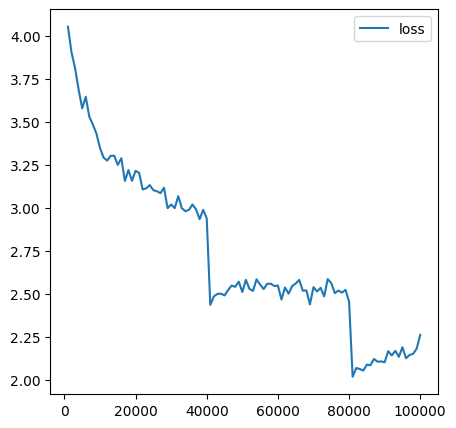

In [ ]:
import matplotlib.pyplot as plt

loss_list = [4.052, 3.9024, 3.8115, 3.6862, 3.5778, 3.645, 3.5287, 3.4831, 3.4306, 3.3474, 3.2912, 3.2737, 3.3013, 3.302, 3.2485, 3.2873, 3.1551, 3.2187, 3.1558, 3.2143, 3.2026, 3.1058, 3.1125, 3.1308, 3.1016, 3.0955, 3.0841, 3.1158, 2.9965, 3.0185, 2.9973, 3.067, 2.9971, 2.9793, 2.9872, 3.0184, 2.9895, 2.9331, 2.9872, 2.938, 2.4342, 2.4837, 2.4984, 2.4994, 2.4893, 2.5203, 2.5471, 2.5393, 2.5697, 2.5092, 2.5799, 2.5277, 2.5157, 2.583, 2.5523, 2.5263, 2.557, 2.5574, 2.5441, 2.5471, 2.4655, 2.5356, 2.4992, 2.5436, 2.5586, 2.5797, 2.5167, 2.5184, 2.4374, 2.5378, 2.5123, 2.5333, 2.4837, 2.5844, 2.5606, 2.5029, 2.5179, 2.5057, 2.5218, 2.4538, 2.0162, 2.067, 2.0616, 2.0522, 2.0869, 2.0833, 2.1198, 2.1042, 2.1053, 2.1008, 2.1648, 2.1402, 2.167, 2.1325, 2.1879, 2.124, 2.1428, 2.1498, 2.1799, 2.2597]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot([i*1000 for i in range(1, len(loss_list)+1)], loss_list, label="loss")
plt.legend()
plt.show()

In [11]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-ja-en"

tokenizer = MarianTokenizer.from_pretrained(model_name)
# model = MarianMTModel.from_pretrained(model_name)
model = MarianMTModel.from_pretrained('/content/drive/MyDrive/nlp100/output/checkpoint-100000')

src_text = ["五重塔は法隆寺にあります"]
# src_text = "こんにちは"

# print(tokenizer(src_text, return_tensors="pt", padding=True))
translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True), num_beams=4)
tgt_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
print(translated)
print(tgt_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[60715,    66,  1030,   146, 42616,   376, 13239, 22007,   290,    32,
            25, 16373, 27583,   146,  7899, 20688,     2,     0]])
['The five-storey pagoda is in Horyu-ji Temple.']


In [ ]:
import json
from nltk.translate.bleu_score import corpus_bleu

with open('/content/drive/MyDrive/nlp100/data/test.json', 'r', encoding='utf-8') as f:
    data = [json.loads(l.strip()) for l in f.readlines()]

data = data[:100]
references = [[data[i]['translation']['en'].replace(',', '').replace('.', '')] for i in range(len(data))]
sources = [data[i]['translation']['ja'] for i in range(len(data))]

models = ['Helsinki-NLP/opus-mt-ja-en', '/content/drive/MyDrive/nlp100/output/checkpoint-100000']
for model_name in models:
    model = MarianMTModel.from_pretrained(model_name)
    translated = model.generate(**tokenizer(sources, return_tensors="pt", padding=True), num_beams=2)
    candidates = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    candidates = [c.replace(',', '').replace('.', '') for c in candidates]

    bleu = corpus_bleu(references, candidates)
    print(f'{model_name}:\nbleu={bleu}')

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Helsinki-NLP/opus-mt-ja-en:
bleu=0.30814407540966227
/content/drive/MyDrive/nlp100/output/checkpoint-100000:
bleu=0.5098091977503276


In [ ]:
import json
from nltk.translate.bleu_score import corpus_bleu

with open('/content/drive/MyDrive/nlp100/data/dev.json', 'r', encoding='utf-8') as f:
    data = [json.loads(l.strip()) for l in f.readlines()]

data = data[:100]
references = [[data[i]['translation']['en'].replace(',', '').replace('.', '')] for i in range(len(data))]
sources = [data[i]['translation']['ja'] for i in range(len(data))]

model = MarianMTModel.from_pretrained('/content/drive/MyDrive/nlp100/output/checkpoint-100000')
for n in [1, 2, 3, 4, 5]:
    translated = model.generate(**tokenizer(sources, return_tensors="pt", padding=True), num_beams=n)
    candidates = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    candidates = [c.replace(',', '').replace('.', '') for c in candidates]

    bleu = corpus_bleu(references, candidates)
    print(f'beam size={n}, bleu={bleu}')

beam size=1, bleu=0.48019786931462904
beam size=2, bleu=0.4908463562703688
beam size=3, bleu=0.5014204658643159
beam size=4, bleu=0.5028367721544545
beam size=5, bleu=0.4965288470380954
